<a href="https://colab.research.google.com/github/Sravya-Duvvuri/Traffic/blob/main/TryYolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Jun 20 09:50:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [17]:
# Pip install method

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.39 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.6/78.2 GB disk)


In [18]:
from ultralytics import YOLO

from IPython.display import display, Image

In [20]:
!mkdir try
!%cd try      #Checking
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/bin/bash: line 1: fg: no job control
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/1 /dog.jpeg: 640x384 1 person, 1 car, 1 dog, 102.8ms
Speed: 3.2ms preprocess, 102.8ms inference, 562.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


/bin/bash: line 1: fg: no job control


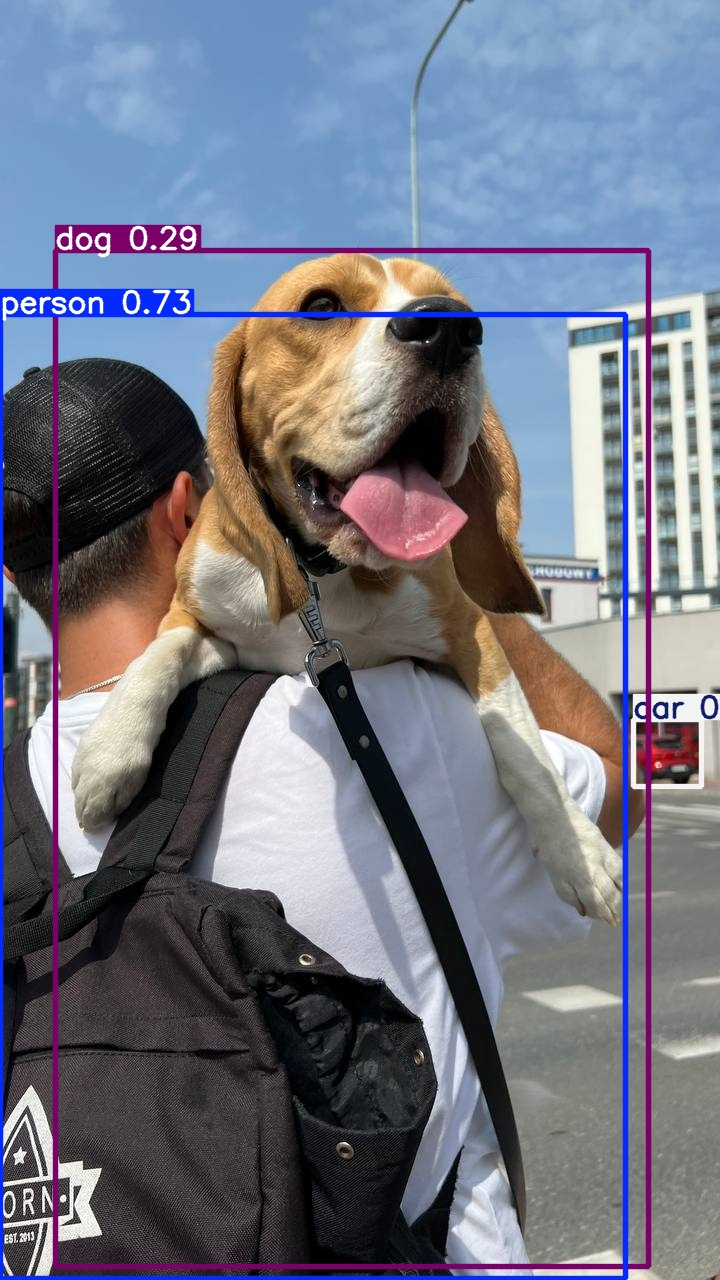

In [21]:
!%cd try
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [26]:
# Install ultralytics package for YOLOv8
!pip install ultralytics --quiet

# Import necessary libraries
import os
from ultralytics import YOLO
from PIL import Image
import IPython.display as display

# Define the 'try' directory path
try_dir = os.path.expanduser("~/try")
os.makedirs(try_dir, exist_ok=True)

# Download the YOLOv8 model if it's not already in the 'try' directory
model_path = f'{try_dir}/yolov8n.pt'
if not os.path.exists(model_path):
    !wget -P {try_dir} https://github.com/ultralytics/yolov8/releases/download/v8.0.0/yolov8n.pt

# Load the YOLOv8 model
model = YOLO(model_path)

# Perform the prediction
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /dog.jpeg: 640x384 1 person, 1 car, 1 dog, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


In [27]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [28]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [29]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [45]:
!pip uninstall -y ultralytics
!pip install ultralytics==8.0.196

Found existing installation: ultralytics 8.0.196
Uninstalling ultralytics-8.0.196:
  Successfully uninstalled ultralytics-8.0.196
  Using cached ultralytics-8.0.196-py3-none-any.whl (631 kB)


In [1]:
import ultralytics
print(ultralytics.__version__)

8.0.196


In [48]:
# Ensure the directory exists and navigate to it
import os

dataset_directory = "/content/try/datasets"
if not os.path.exists(dataset_directory):
    os.makedirs(dataset_directory)

%cd {dataset_directory}

# Install roboflow library
!pip install roboflow --quiet

# Import necessary libraries and set up Roboflow
from roboflow import Roboflow

# Initialize Roboflow with your API key
rf = Roboflow(api_key="U9vcNij6BQQCcxEVzcQz")

# Load the specific project and version from Roboflow
project = rf.workspace("traffic-zqyib").project("emergency_vehicles-yetxy")
dataset = project.version(1).download("yolov8")

# Verify the current working directory
!pwd

# List contents to verify dataset download
!ls


/content/try/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Emergency_Vehicles-1 in yolov8:: 100%|██████████| 6882/6882 [00:01<00:00, 5754.29it/s]


/content/try/datasets
Emergency_Vehicles-1


In [49]:
!pwd

/content/try/datasets


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/try/datasets/Emergency_Vehicles-1/data.yaml epochs=25 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 469MB/s]
New https://pypi.org/project/ultralytics/8.2.39 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/try/datasets/Emergency_Vehicles-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_